This notebook provides an example of how to use the `poopy` package to access historical CSO discharge monitoring data provided by water companies.

First, we import the libraries we need.

In [1]:
from poopy.companies import ThamesWater

# To help demonstrate the package
import datetime
import os
import matplotlib.pyplot as plt

First we initiate an instance of a `WaterCompany` object. We opt to use the `ThamesWater` as an example. 

In [2]:
tw_clientID = os.getenv("TW_CLIENT_ID")
tw_clientSecret = os.getenv("TW_CLIENT_SECRET")

if tw_clientID is None or tw_clientSecret is None:
    raise ValueError(
        "Thames Water API keys are missing from the environment!\n Please set them and try again."
    )

tw = ThamesWater(tw_clientID, tw_clientSecret)

Initialising Thames Water object...
Requesting current status data from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=1000
	No more records to fetch


Initiating a `WaterCompany` object will automatically download the current status of all the monitors. What we want to do is explore historical information for past discharges. This can either be done at the level of the individual `Monitor` or at the level of the `WaterCompany`. Lets explore the former first using the "Bourton-On-The-Water" monitor.

In [3]:
monitor = tw.active_monitors["Bourton-On-The-Water"]
monitor.get_history(verbose=True)

Requesting historical data for Bourton-On-The-Water from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	No more records to fetch
	Printing full API response...
             LocationName PermitNumber LocationGridRef       X       Y  \
0    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   
1    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   
2    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   
3    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   
4    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   
5    Bourton-On-The-Water    CTCR.2036      SP17621907  417620  219070   

Above, we ran the `get_history()` method that extracts the historical data for a given monitor. This information is stored in the `Monitor` object in the `history` attribute. This is a List of `Event` objects. For example, lets see what the fifth event in the history is. Recall that an `Event` object can either be a `Discharge`, `Offline` or `NoDischarge`. 

In [4]:
fifth_event = monitor.history[4]
fifth_event.print()


        
        --------------------------------------
        Event Type: Not Discharging
        Site Name: Bourton-On-The-Water
        Permit Number: CTCR.2036
        OSGB Coordinates: (417620, 219070)
        Receiving Watercourse: Groundwater
        Start Time: 2024-05-09 12:15:00
        End Time: 2024-05-22 06:15:00
        Duration: 18360.0 minutes
        


To visualise the history once it has been calculated we can use the `plot_history()` method. This will plot the history of the monitor as a 'barcode', the colour of the bar corresponds to the status of the event through time. Brown is a discharge, grey is offline and white is no discharge. Note that the barchart automatically goes back as far as the first recorded discharge or offline event for that monitor. 

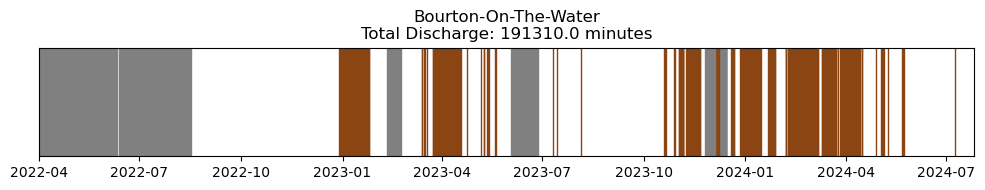

In [5]:
monitor.plot_history()

We can make it plot for a shorter period by passing a `since` parameter. For example, lets look at only the last 3 months.

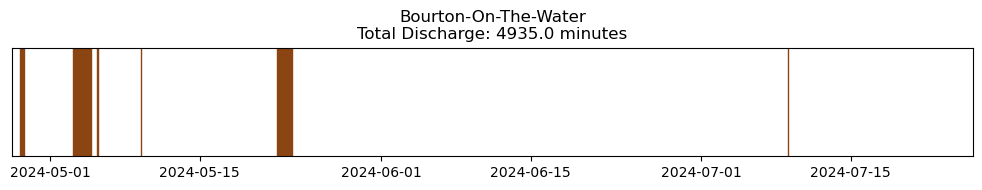

In [6]:
since_3_months = datetime.datetime.now() - datetime.timedelta(days=90) # 90 days = 3 months
monitor.plot_history(since=since_3_months)

We can print out some summary information about the total amount of discharge as follows:

In [7]:
print(f"Total discharge: {monitor.total_discharge()} minutes")
print(f"Total discharge last 12 months: {monitor.total_discharge_last_12_months()} minutes")
print(f"Total discharge last 6 months: {monitor.total_discharge_last_6_months()} minutes")
print(f"Total discharge since start of year: {monitor.total_discharge_since_start_of_year()} minutes")
print(f"Total discharge last 3 months: {monitor.total_discharge(since=since_3_months)} minutes")

Total discharge: 191310.0 minutes
Total discharge last 12 months: 125190.0 minutes
Total discharge last 6 months: 79673.10258456667 minutes
Total discharge since start of year: 100320.0 minutes
Total discharge last 3 months: 4935.0 minutes


If we want to calculate the history for all monitors managed by a particular water company we can do this by calling the `set_all_histories()` method on the `WaterCompany` object. This sets the `history` attribute of all the monitors in the `WaterCompany` object.

In [8]:
tw.set_all_histories()

Requesting historical data for all monitors from Thames Water API...
	Requesting historical events since 2022-04-01 00:30:00...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=2000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=3000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=4000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=5000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=6000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/S

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Abbey Mills contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-05-13T11:15:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Abbey Mills contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-05-02T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Abbey Mills contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-05-02T08:15:00. Skipping that entry...
  warnings.warn(


	Building history for Basingstoke...
	Building history for Abbeydale Road...	Building history for Bell Lane Creek...

	Building history for Abingdon...
	Building history for Ash Ridge (Wokingham)...
	Building history for Beckley...
	Building history for Biscot Road CSO...
	Building history for Bishop Stortford Main...
	Building history for Acton & Storm Works...
	Building history for Beckton...
	Building history for Ash Vale...
	Building history for Blacknest, Sunningdale...
	Building history for Beddington...
	Building history for Bell Wharf...
	Building history for Benson...
	Building history for Aldermaston...
	Building history for Boddington...
	Building history for Beech Hall Crescent, Walthamstow...
	Building history for Aston Le Walls...
	Building history for Auckland Road Storm Tanks...
	Building history for Avon Dassett...
	Building history for Bentley...
	Building history for Bentsbrook Road...
	Building history for Berkhamsted...
	Building history for Brent Cross Flyover...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Dartford Creek Storm contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-15T23:45:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Dartford Creek Storm contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-12-06T03:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Dartford Creek Storm contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-12-06T03:00:00. Skipping that entry...
  warnings.warn(


	Building history for Dartnell Park, Byfleet...
	Building history for Chobham...
	Building history for Deadmans Bridge...
	Building history for Cuddington...
	Building history for Dean Oak Lane...
	Building history for District Road...
	Building history for Deephams...
	Building history for Dorchester...
	Building history for Culham...
	Building history for Deptford Creek Storm...
	Building history for Colin Crescent, Colindale...
	Building history for Dorking...
	Building history for Deptford Storm Relief...
	Building history for Combe...
	Building history for Dunstable Road - Beech Road CSO 2...
	Building history for Cholsey...	Building history for Culworth...	Building history for Dunstable Road - Francis Street...


	Building history for Duntshill Road...
	Building history for Earl...
	Building history for Church Hanborough...
	Building history for Earlswood (Reigate)...
	Building history for Cricklewood Broadway...
	Building history for Didcot...
	Building history for Cricklewood L

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Gerrards Cross contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-08-14T10:15:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Gerrards Cross contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-08-10T14:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Gerrards Cross contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-08-10T14:00:00. Skipping that entry...
  warnings.warn(


	Building history for Goswell Street...
	Building history for Frogmore Storm...
	Building history for Granville Road...
	Building history for Great Bedwyn...
	Building history for Godalming...
	Building history for Fleet Main Line Sewer...
	Building history for Haddenham...
	Building history for Gordon Road...
	Building history for Gordon Road (u205)...
	Building history for Goring...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-02T08:46:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-09-08T10:48:00. Skipping that entry...
  warnings.warn(


	Building history for Hadham Mill...

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-09-08T10:48:00. Skipping that entry...
  warnings.warn(



	Building history for Faringdon House CSO...
	Building history for Hambleden...
	Building history for Fulmer Drive CSO (Howards Wood Drive)...
	Building history for Hanwell...
	Building history for Fyfield (Wilts)...
	Building history for Gap Road (Cemetery)...
	Building history for Garden Way...
	Building history for Hammersmith...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-06-14T15:06:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-06-10T13:14:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-06-10T13:14:00. Skipping that entry...
  warnings.warn(


	Building history for Hampstead Norreys...
	Building history for Greatworth...
	Building history for Greenwich...
	Building history for Farnborough (Warks)...
	Building history for Henley...
	Building history for Grendon Underwood...
	Building history for Harpenden...
	Building history for Hamstead Marshall...
	Building history for Hartley Wintney...
	Building history for Haslemere...
	Building history for Guildford...
	Building history for Highworth Eastrop...
	Building history for Gun Wharf (Wapping Dock)...
	Building history for Hillside Avenue...
	Building history for Henley Road...
	Building history for Honeypot Lane...
	Building history for Hockford (Pirbright)...
	Building history for Haslemere STW CSO...
	Building history for Heyford...
	Building history for Hatfield Heath...
	Building history for Hattchets Cricklade...
	Building history for Hook Norton...
	Building history for Hull Green (Matching)...
	Building history for Hungerford...
	Building history for Hanger Lane...	Bui

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Leatherhead contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-11-03T09:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Leatherhead contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-10-30T00:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Leatherhead contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-10-30T00:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy

	Building history for Home Park Road...
	Building history for Knightsbridge Road, Camberley...
	Building history for Knowle Lane, Cranleigh...
	Building history for Lechlade...
	Building history for Kingston Bagpuize...
	Building history for Horton-Cum-Studley...
	Building history for Leaden Roding...
	Building history for Little Hallingbury...
	Building history for Leopold Road, Church Path...
	Building history for Huckers Lane (Selbourne)...
	Building history for Little Marlow...
	Building history for Long Crendon...
	Building history for Little Milton...
	Building history for Long Reach...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Little Milton contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-12T15:45:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Little Milton contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-12-19T11:15:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Little Milton contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-12-19T11:15:00. Skipping that entry...
  warnings.warn(


	Building history for Leverson Street...
	Building history for Lightwater...
	Building history for Ludgershall...
	Building history for Littlemead Ind Estate, Cranleigh...
	Building history for Longbridge Road...
	Building history for Lincoln Road CSO...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-23T08:45:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-01-02T08:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-01-02T08:00:00. Skipping that entry...
  warnings.warn(


	Building history for Lindsay Drive, Falcon Way...
	Building history for Maple Lodge...
	Building history for Littlemore Low Level...
	Building history for Longley Road (1), Tooting High Street...
	Building history for Longstone Ave, Drayton Road...
	Building history for Low Hall Farm Storm Tanks, Walthamstow...
	Building history for London Bridge...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor London Bridge contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-09T13:42:00. Skipping that entry...
  warnings.warn(


	Building history for Marsworth...


/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor London Bridge contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-11-28T17:52:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor London Bridge contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-11-28T17:52:00. Skipping that entry...
  warnings.warn(


	Building history for London Road Near Hatherop Lane...
	Building history for Little Compton...
	Building history for London Road, Marlborough...
	Building history for Mays Lane Overflow ...
	Building history for Low Level 1 N, Grosvenor Ditch, Millb...
	Building history for Mill Green (Hatfield)...
	Building history for Mapleton Road...
	Building history for Luton...
	Building history for Millbank, Crawley...
	Building history for Markenfield Road, Guildford...
	Building history for Lower Cherwell St, Banbury...
	Building history for Markyate...
	Building history for Milton-Under-Wychwood...
	Building history for Lyon Park Avenue...
	Building history for Lytton Road SSO...
	Building history for Maidenhead...
	Building history for Melford Road, London, E11...
	Building history for Main Road, Sidcup...
	Building history for Merstham...
	Building history for Mornington Crescent...
	Building history for Mortimer (Stratfield)...
	Building history for Middle Barton...
	Building history for 

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Ne Storm Relief Shadwell, King Edward Mem Park contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-12-04T12:38:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Ne Storm Relief Shadwell, King Edward Mem Park contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-12-01T09:32:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Ne Storm Relief Shadwell, King Edward Mem Park contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-12-01T09:32:00. Ski

	Building history for Oakentrough...
	Building history for Oakley Road...
	Building history for Mogden...
	Building history for Near Sezincote Lodge...
	Building history for Ockham Road South Foul Sewer Overflow...
	Building history for Peterborough Road 1...
	Building history for Pinkham Way Storm Sewage O/F, London...
	Building history for Neasden Station...
	Building history for Park Street Luton...
	Building history for Portsmouth Road, Uxbridge Road...
	Building history for Park Town South & West, Luton...
	Building history for Princes Avenue...
	Building history for Passfield...	Building history for Netherlands Road CSO...

	Building history for Pauls Pier...
	Building history for Montrose Avenue/Blenheim Crescent...
	Building history for Princes Risborough...
	Building history for Moreton Pinkney...
	Building history for Puller Rd/Calvert Rd Storm, Barnet...	Building history for Moreton-In-Marsh...

	Building history for Purton...
	Building history for Moreton-In-Marsh (Primrose

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Savoy Street contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-03-30T14:18:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Savoy Street contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-03-30T14:18:00. Skipping that entry...
  warnings.warn(


	Building history for Selborne...	Building history for Penwith Road...

	Building history for Sevenhampton Village...
	Building history for Smith Street...
	Building history for Shotteswell...
	Building history for Somerset Road, Wimbledon...
	Building history for Shabbington...
	Building history for Sonning Common...
	Building history for South Close, Barnet...
	Building history for South Ealing Road, W5...
	Building history for Newmans Lane...
	Building history for Nightingale Lane...
	Building history for South Lane, Ash...
	Building history for Shrivenham...
	Building history for Outside 115 Wentworth Road...
	Building history for Shad, Thames...
	Building history for Outside 135 Leeside Crescent (Formerly Brookside Road, Golders Green)...
	Building history for South Leigh...
	Building history for Oxford...
	Building history for South Norwood...	Building history for South Moreton...

	Building history for South Park, Ilford...
	Building history for Stamford Brook...
	Building histo

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-15T20:56:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-10-13T16:00:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-10-13T16:00:00. Skipping that entry...
  warnings.warn(


	Building history for St Jamess Road...	Building history for Sunnyside Road...

	Building history for SW Storm Relief Sewer, London...
	Building history for Stanton Harcourt...
	Building history for Park Street - Bailey Street...
	Building history for St Pauls Avenue CSO...
	Building history for Sloane Street, Raneleigh Gardens...
	Building history for Stag Lane CSO...
	Building history for Taylors Crescent, Cranleigh...
	Building history for Temple Place Essex Street...
	Building history for Swains Road...
	Building history for Tetsworth...
	Building history for Swindon (Rodbourne)...
	Building history for Stoke Road, Cobham...
	Building history for Marsh Lane Bridge, Taplow...
	Building history for Marston St Lawrence SPS...
	Building history for Thornwood...
	Building history for Stone...
	Building history for Tackley...
	Building history for Norfolk Street...
	Building history for North End Road CSO...
	Building history for North Weald...
	Building history for Trumps Green...
	Buil

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2022-10-27T10:30:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-10-23T10:30:00. Skipping that entry...
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/companies.py:342: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-10-23T10:30:00. Skipping that entry...
  warnings.warn(


	Building history for Wargrave...
	Building history for Streatham & Balham Storm Relief...
	Building history for Western Way...
	Building history for Well Hall Road Eltham...
	Building history for West End, Essendon...
	Building history for Weston (Herts)...
	Building history for West Heath Ramsdell...
	Building history for Wheatley...
	Building history for Weston Park...
	Building history for Weston-On-The-Green SPS...	Building history for Warmington...

	Building history for Weston-On-The-Green STW...
	Building history for Wimbledon Hill Wimbledon...
	Building history for Vauxhall Motors...
	Building history for Windsor...
	Building history for Streatham Storm Relief...	Building history for Waddesdon...

	Building history for West Putney S R, Horne Way...
	Building history for West Way, Botley (Syphon)...
	Building history for White Roding...
	Building history for Westway Close...
	Building history for Weybridge...
	Building history for White Waltham...
	Building history for Wanborou

Then, the monitor's history object can be accessed as before. For example, lets get the history for the "Marlborough" monitor.

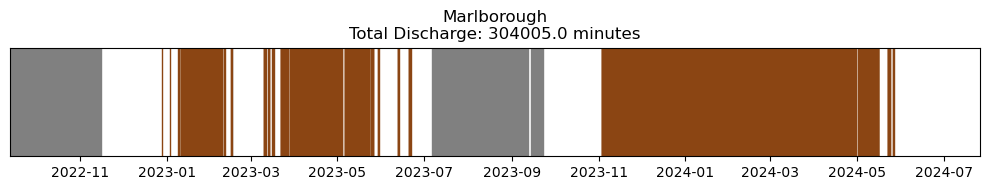

In [9]:
monitor = tw.active_monitors["Marlborough"]
monitor.plot_history()

We can query what event was occurring at a particular time as follows: 

In [10]:
time = datetime.datetime(2024, 1, 1)
event = monitor.event_at(time)
event.print()


        
        --------------------------------------
        Event Type: Discharging
        Site Name: Marlborough
        Permit Number: TEMP.2763
        OSGB Coordinates: (420120, 169200)
        Receiving Watercourse: River Kennet
        Start Time: 2023-12-31 15:45:00
        End Time: 2024-01-01 00:45:00
        Duration: 540.0 minutes
        


Alternatively, we can get all of the discharge events in the form of a `pandas` dataframe using the `get_history_df()` method. This returns a dataframe that contains all the discharge events for all the monitors managed by the water company, sorted from newest to oldest start times. This dataframe can then be analysed using standard pandas methods. The head of this dataframe is shown below:

In [11]:
df = tw.history_to_discharge_df()
print(df.head())

Building output data-table
	Processing (Northern) Low Level No 1 Brook Green
	Processing 15 Coldharbour Lane, Bushey
	Processing Abbess Roding
	Processing Abbey Mills
	Processing Abbeydale Road
	Processing Abingdon
	Processing Acton & Storm Works
	Processing Aldermaston
	Processing Aldershot Town
	Processing Alicia Avenue CSO
	Processing Allendale Road
	Processing Amersham Balancing Tanks/Amersham Vale STK
	Processing Ampney St Peter
	Processing Amyand Park Road, Twickenham
	Processing Andoversford
	Processing Appleton
	Processing Arborfield
	Processing Arford
	Processing Ascot
	Processing Ash Ridge (Wokingham)
	Processing Ash Vale
	Processing Aston Le Walls
	Processing Auckland Road Storm Tanks
	Processing Avon Dassett
	Processing Avondale Rd
	Processing Aylesbury
	Processing Bakers Farm, High Wych
	Processing Bampton
	Processing Banbury
	Processing Banbury Rd Middleton Cheney
	Processing Bancroft Rugby Ground, Buckhurst Hill
	Processing Barbers Lane
	Processing Barkway
	Processing Ba

This can then be saved to file using the standard Pandas methods. For example, to save it as a CSV file that can be analysed using other tools (e.g, Excel) we can do the following:

In [12]:
filename = tw.name + tw.history_timestamp.strftime("%y%m%d%H%M%S") + ".csv"
print(f"Saving history to {filename}")
df.to_csv(filename, header=True, index=False)

Saving history to ThamesWater240726095153.csv


We can do a similar thing for the offline events using the `history_to_offline_df()` method. This returns a dataframe that contains all the offline events for all the monitors managed by the water company, sorted from newest to oldest start times.

In [13]:
offline_df = tw.history_to_offline_df()
print(offline_df.head())

Building output data-table
	Processing (Northern) Low Level No 1 Brook Green
	Processing 15 Coldharbour Lane, Bushey
	Processing Abbess Roding
	Processing Abbey Mills
	Processing Abbeydale Road
	Processing Abingdon
	Processing Acton & Storm Works
	Processing Aldermaston
	Processing Aldershot Town
	Processing Alicia Avenue CSO
	Processing Allendale Road
	Processing Amersham Balancing Tanks/Amersham Vale STK
	Processing Ampney St Peter
	Processing Amyand Park Road, Twickenham
	Processing Andoversford
	Processing Appleton
	Processing Arborfield
	Processing Arford
	Processing Ascot
	Processing Ash Ridge (Wokingham)
	Processing Ash Vale
	Processing Aston Le Walls
	Processing Auckland Road Storm Tanks
	Processing Avon Dassett
	Processing Avondale Rd
	Processing Aylesbury
	Processing Bakers Farm, High Wych
	Processing Bampton
	Processing Banbury
	Processing Banbury Rd Middleton Cheney
	Processing Bancroft Rugby Ground, Buckhurst Hill
	Processing Barbers Lane
	Processing Barkway
	Processing Ba

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:505: UserWarning: !WARNING! Event is ongoing and has no end time. Returning None.
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:1112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, event._to_row()], ignore_index=True)


	Processing Kimpton Road (Vauxhall Rd)
	Processing Kingham
	Processing Kings Avenue
	Processing Kings Scholars Pond
	Processing Kings Sutton
	Processing Kingsclere
	Processing Kingston Bagpuize
	Processing Kingston Main
	Processing Kingsway (Near Railway Bridge)
	Processing Kingthorpe Terrace
	Processing Kintbury
	Processing Knights Lane
	Processing Knightsbridge Road, Camberley
	Processing Knowle Lane, Cranleigh
	Processing Leaden Roding
	Processing Leatherhead
	Processing Lechlade
	Processing Leopold Road, Church Path
	Processing Leverson Street
	Processing Lightwater
	Processing Lincoln Road CSO
	Processing Lindsay Drive, Falcon Way
	Processing Little Compton
	Processing Little Hallingbury
	Processing Little Marlow
	Processing Little Milton
	Processing Littlemead Ind Estate, Cranleigh
	Processing Littlemore Low Level
	Processing London Bridge
	Processing London Road Near Hatherop Lane
	Processing London Road, Marlborough
	Processing Long Crendon
	Processing Long Reach
	Processing Lo

We may want to work out the particular downstream impact at a given point in time. For example, if we wanted to know how many upstream discharges were ocurring at a particular point in the drainage network at a specific point in time. This is possible as follows: 

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:351: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Bampton. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:351: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Barbers Lane. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:351: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Birchanger - Duck End. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:351: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Bridle Close, Ewell. 
Probably the monitor was not active at that

(Text(0.5, 0, 'Easting'), Text(0, 0.5, 'Northing'))

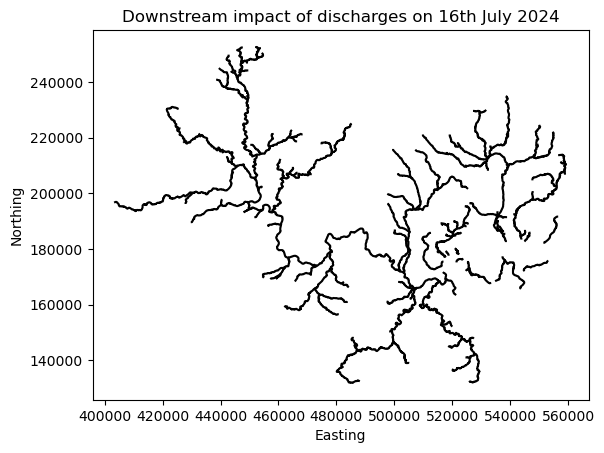

In [14]:
time = datetime.datetime(2024, 7, 16) # 16th July 2024
downstream = tw.get_historical_downstream_impact_at(time=time, include_recent_discharges=True) # Calculate downstream impact on 16th July, including recent discharges (within 48 hours)

# `downstream` is a 2D numpy array with the # number of discharges upstream of each cell on the DEM grid
# We can cast it to a geojson for easier visualisation

geojson = tw._accumulator.get_channel_segments(downstream, threshold=0.9)
segs = tw._accumulator.get_channel_segments(downstream, threshold=0.9)
for line in segs["coordinates"]:
    x = [c[0] for c in line]
    y = [c[1] for c in line]
    plt.plot(x, y, color="k")
plt.title("Downstream impact of discharges on 16th July 2024")
plt.xlabel("Easting"), plt.ylabel("Northing")

In fact, we can go further and calculate more detailed information about the downstream impact of CSOs at any point in the past. For example, we can calculate the total number of upstream discharges, and the number of upstream discharges per unit area, as well as the list of names of upstream discharges. This is done as follows: 

In [15]:
info_geojson = tw.get_historical_downstream_info_geojson_at(time=time, include_recent_discharges=True)

We can then visualise this: 

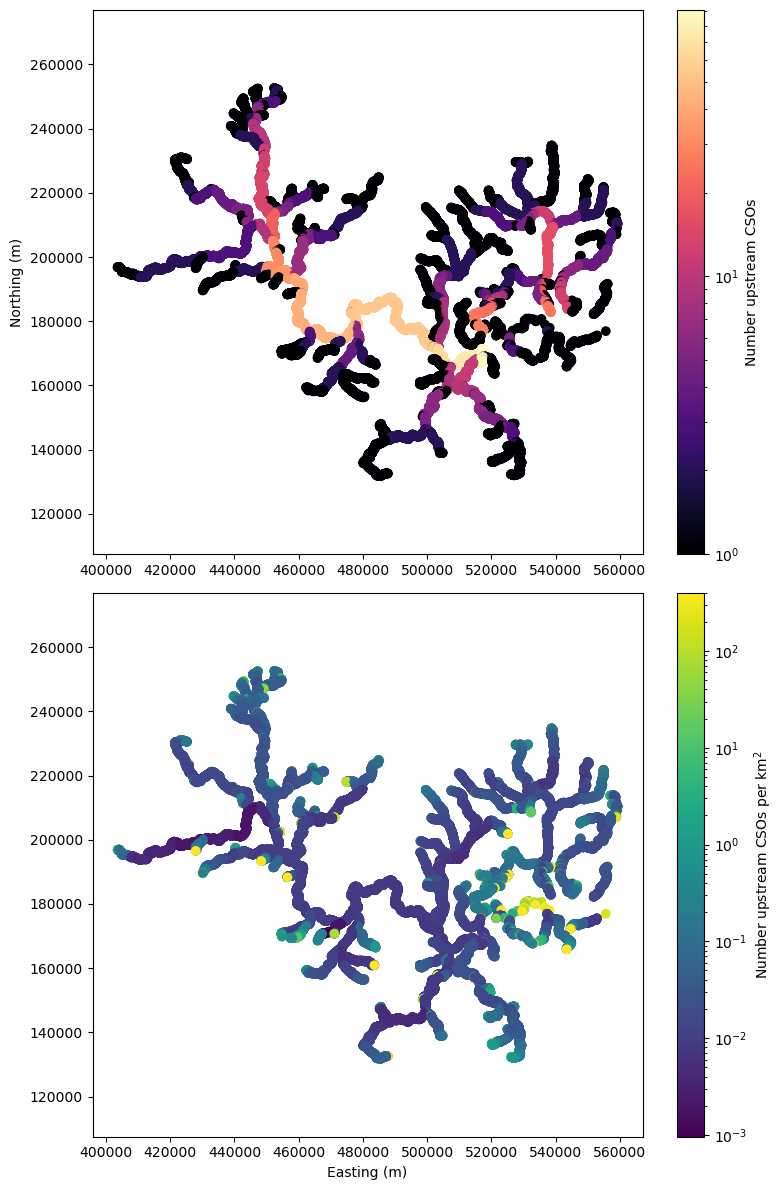

In [16]:
from matplotlib.colors import LogNorm

x, y, num_upst, num_upst_per_km2 = [], [], [], []
for feature in info_geojson.features:
    x.append(feature.geometry.coordinates[0])
    y.append(feature.geometry.coordinates[1])
    num_upst.append(feature.properties["number_upstream_CSOs"])
    num_upst_per_km2.append(feature.properties["number_CSOs_per_km2"])

plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.scatter(x, y, c=num_upst, norm=LogNorm(), cmap="magma")
plt.ylabel("Northing (m)")
plt.axis("equal")
cb = plt.colorbar()
cb.set_label("Number upstream CSOs")
plt.subplot(2, 1, 2)
plt.scatter(x, y, c=num_upst_per_km2, norm=LogNorm(), cmap="viridis")
plt.axis("equal")
cb = plt.colorbar()
cb.set_label("Number upstream CSOs per km$^2$")
plt.xlabel("Easting (m)")
plt.tight_layout()
plt.show()

Lets say we want to look at how CSO overflows have changed over time. Or perhaps how many monitors are online at any one time across a water companies patch. We can do this using the `get_monitor_timeseries()` method of a `WaterCompany`. This generates time series of the number of active CSOs, recently active CSOs and online monitors at 15 minute intervals (the approximate frequency of the data). Lets generate this data from the start of 2022.

In [17]:
since = datetime.datetime(2022, 1, 1)
monitor_series = tw.get_monitor_timeseries(since=since)

Processing (Northern) Low Level No 1 Brook Green
Processing 15 Coldharbour Lane, Bushey
Processing Abbess Roding
Processing Abbey Mills
Processing Abbeydale Road
Processing Abingdon
Processing Acton & Storm Works
Processing Aldermaston
Processing Aldershot Town
Processing Alicia Avenue CSO
Processing Allendale Road
Processing Amersham Balancing Tanks/Amersham Vale STK
Processing Ampney St Peter
Processing Amyand Park Road, Twickenham
Processing Andoversford
Processing Appleton
Processing Arborfield
Processing Arford
Processing Ascot
Processing Ash Ridge (Wokingham)
Processing Ash Vale
Processing Aston Le Walls
Processing Auckland Road Storm Tanks
Processing Avon Dassett
Processing Avondale Rd
Processing Aylesbury
Processing Bakers Farm, High Wych
Processing Bampton
Processing Banbury
Processing Banbury Rd Middleton Cheney
Processing Bancroft Rugby Ground, Buckhurst Hill
Processing Barbers Lane
Monitor Barbers Lane has no recorded events
Processing Barkway
Processing Basingstoke
Process

Now lets plot the results.

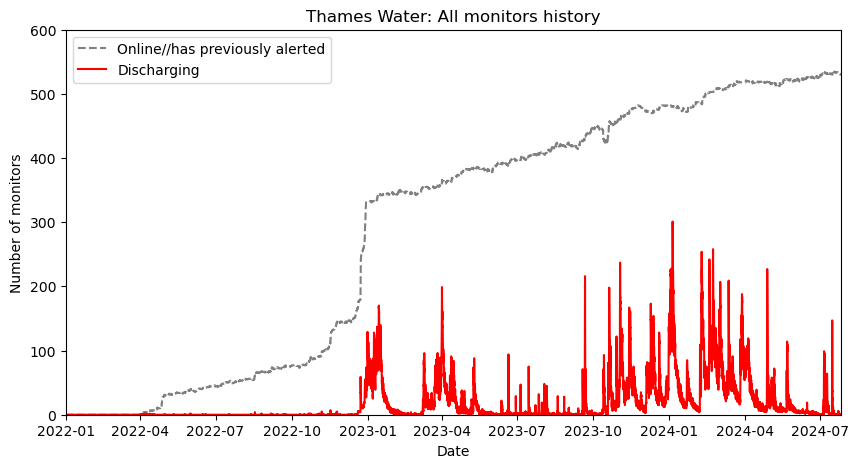

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online//has previously alerted",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_discharging"],
    c="red",
    label="Discharging",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 600)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Note that for "online" we conservatively assume that every monitor was _offline_ until we receive any positive event from it. This means that if a monitor is installed but recording    'NotDischarging' for a month until its first discharge event, it will be counted as offline for that month. Lacking any other information, this is the most conservative assumption we can make.  The first few monitors were attached to the API in April 2022, so the number of monitors "online" since then rises. But, in December '22/January '23 many more were hooked up and so the number of monitors "online" spikes. Since then, the coverage has got gradually better but the number of active monitors has remained fairly constant. It is therefore inappropriate to use this dataset to compare discharge histories between 2022 and 2023, as the number of active monitors has changed so much. You should use the annual returns for that instead. As expected there are more CSOs active during the winter months. To get a more averaged (less 'spiky') view of the data we can look at those which have been active in the last 48 hours (shown below) but the overall picture is the same.

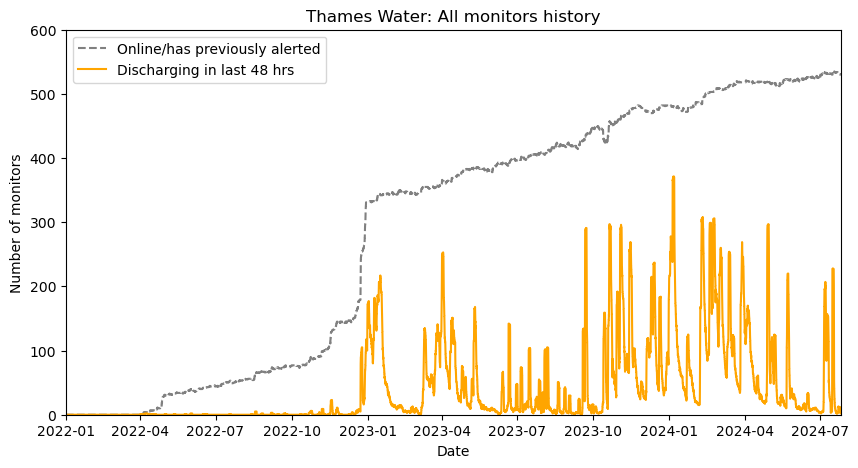

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online/has previously alerted",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_recently_discharging"],
    c="orange",
    label="Discharging in last 48 hrs",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 600)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Finally we can see how easy it is to generate some simple statistics about the data. For example:

In [20]:
number_online_now = monitor_series["number_online"].iloc[-1]
print(f"Number of monitors 'online' now: {number_online_now}")
number_discharging_now = monitor_series["number_discharging"].iloc[-1]
print(f"Number of monitors discharging now: {number_discharging_now}")
print(f"Proportion of monitors discharging now: {number_discharging_now / number_online_now * 100:.2f}%")
number_recently_discharging_now = monitor_series["number_recently_discharging"].iloc[-1]
print(f"Number of monitors discharging in last 48 hrs: {number_recently_discharging_now}")
print(f"Proportion of monitors discharging in last 48 hrs: {number_recently_discharging_now / number_online_now * 100:.2f}%")

Number of monitors 'online' now: 530
Number of monitors discharging now: 0
Proportion of monitors discharging now: 0.00%
Number of monitors discharging in last 48 hrs: 2
Proportion of monitors discharging in last 48 hrs: 0.38%
